In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import power_transform
from sklearn.ensemble import IsolationForest
from sklearn.cluster import AgglomerativeClustering

# Read_Data

In [2]:
data=pd.read_csv('CC GENERAL.csv')

In [3]:
data.set_index(['CUST_ID'],inplace=True,drop=True)

In [4]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data_Invistigation

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


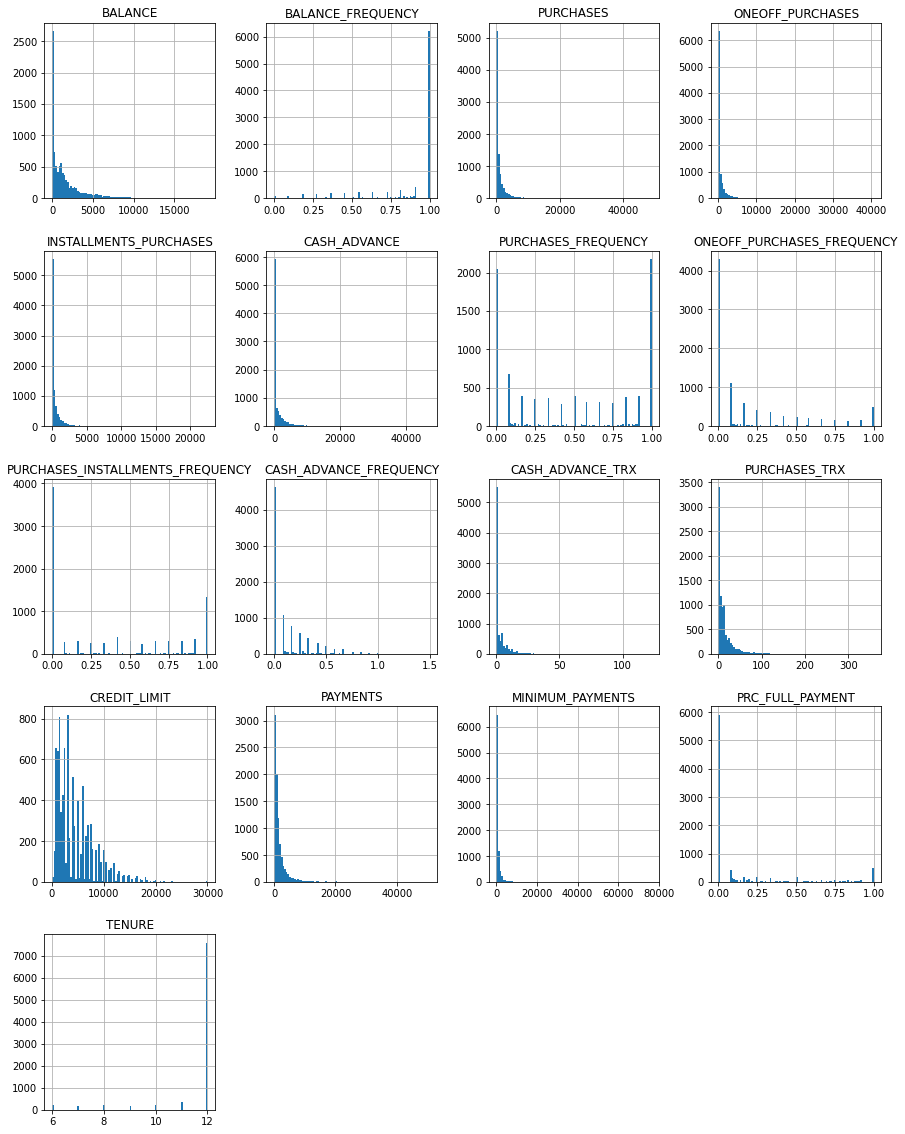

In [6]:
data.hist(bins=int(np.sqrt(len(data))),figsize=(15,20));

# Imputing_Nans

In [7]:
null_columns=data.columns[data.isnull().any()].tolist()
null_columns

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [8]:
data.isnull().sum()*100/data.shape[0]

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [9]:
#data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)
#data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [10]:

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
After_imputation = imputer.fit_transform(data)

In [11]:
data=pd.DataFrame(After_imputation,columns=data.columns)

In [12]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Handeling outliers

In [13]:
data=pd.DataFrame(np.log1p(data))

# Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data_scaled=scale.fit_transform(data)

In [15]:
data_new=pd.DataFrame(data_scaled,columns=data.columns)
data_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.379045,0.862497,0.422994,0.000000,0.455879,0.000000,0.222393,0.000000,0.115477,0.000000,0.000000,0.186733,0.466811,0.490324,0.438874,0.000000,1.0
1,0.819116,0.932886,0.000000,0.000000,0.000000,0.815075,0.000000,0.000000,0.000000,0.243529,0.333889,0.000000,0.771814,0.767919,0.620013,0.289506,1.0
2,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.435970,0.782631,0.593925,0.572303,0.000000,1.0
3,0.752871,0.710494,0.677125,0.688918,0.000000,0.495472,0.115477,0.115477,0.000000,0.087355,0.143798,0.117816,0.782631,0.000000,0.541349,0.000000,1.0
4,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.115477,0.115477,0.000000,0.000000,0.000000,0.117816,0.495375,0.601905,0.488693,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.343413,1.000000,0.525644,0.000000,0.566509,0.000000,1.000000,0.000000,0.874469,0.000000,0.000000,0.330750,0.466811,0.534304,0.346621,0.584963,0.0
8946,0.304921,1.000000,0.528416,0.000000,0.569497,0.000000,1.000000,0.000000,0.874469,0.000000,0.000000,0.330750,0.466811,0.519056,0.436512,0.000000,0.0
8947,0.324169,0.874469,0.461047,0.000000,0.496890,0.000000,0.874469,0.000000,0.736966,0.000000,0.000000,0.304549,0.466811,0.407049,0.392423,0.321928,0.0
8948,0.271065,0.874469,0.000000,0.000000,0.000000,0.336954,0.000000,0.000000,0.000000,0.168234,0.227915,0.000000,0.358276,0.367415,0.358114,0.321928,0.0


# Visualize_data

In [16]:
tsne_with_data = TSNE(n_components=2,n_jobs=-1,perplexity=30,random_state=1,n_iter=300,verbose=0)
tsne_res=tsne_with_data.fit_transform(data_new)

C:\Users\Honda\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Honda\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [17]:
data_new['res_tsne_0']=tsne_res[:,0]
data_new['res_tsne_1']=tsne_res[:,1]

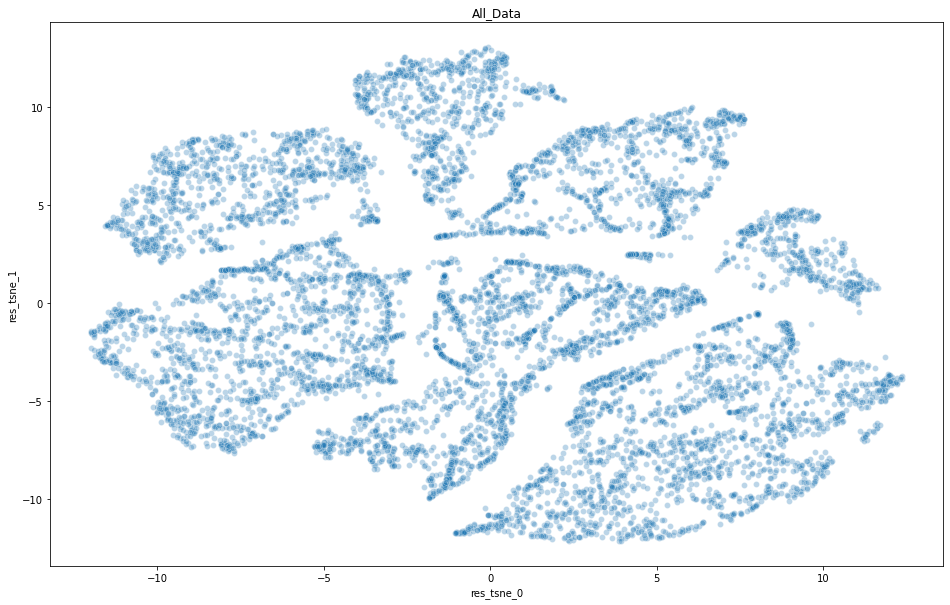

In [18]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=data_new['res_tsne_0'], y=data_new['res_tsne_1'],
    palette=sns.color_palette("hls", 1),
    legend="full",
    data=data_new,
    alpha=0.3
).set(title='All_Data');

In [19]:
data_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,res_tsne_0,res_tsne_1
0,0.379045,0.862497,0.422994,0.000000,0.455879,0.000000,0.222393,0.000000,0.115477,0.000000,0.000000,0.186733,0.466811,0.490324,0.438874,0.000000,1.0,-3.975457,-5.832883
1,0.819116,0.932886,0.000000,0.000000,0.000000,0.815075,0.000000,0.000000,0.000000,0.243529,0.333889,0.000000,0.771814,0.767919,0.620013,0.289506,1.0,3.237673,-8.732363
2,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.435970,0.782631,0.593925,0.572303,0.000000,1.0,0.745128,6.158888
3,0.752871,0.710494,0.677125,0.688918,0.000000,0.495472,0.115477,0.115477,0.000000,0.087355,0.143798,0.117816,0.782631,0.000000,0.541349,0.000000,1.0,1.893576,10.827348
4,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.115477,0.115477,0.000000,0.000000,0.000000,0.117816,0.495375,0.601905,0.488693,0.000000,1.0,7.555971,9.525518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.343413,1.000000,0.525644,0.000000,0.566509,0.000000,1.000000,0.000000,0.874469,0.000000,0.000000,0.330750,0.466811,0.534304,0.346621,0.584963,0.0,2.270700,-0.136461
8946,0.304921,1.000000,0.528416,0.000000,0.569497,0.000000,1.000000,0.000000,0.874469,0.000000,0.000000,0.330750,0.466811,0.519056,0.436512,0.000000,0.0,1.322856,-1.355656
8947,0.324169,0.874469,0.461047,0.000000,0.496890,0.000000,0.874469,0.000000,0.736966,0.000000,0.000000,0.304549,0.466811,0.407049,0.392423,0.321928,0.0,1.830700,-0.734950
8948,0.271065,0.874469,0.000000,0.000000,0.000000,0.336954,0.000000,0.000000,0.000000,0.168234,0.227915,0.000000,0.358276,0.367415,0.358114,0.321928,0.0,4.816016,-2.963958


# K_means_clustering

In [20]:
from sklearn.cluster import KMeans
kmeans_obj= KMeans(n_clusters=4,random_state=22)
kmeans_out=kmeans_obj.fit_transform(data_new)
kmeans_out

array([[ 3.78669385, 12.93083603, 13.18729497,  8.80415414],
       [10.91244084, 12.5744226 , 17.90003369,  2.60381605],
       [10.87582599,  4.86965079,  5.63631228, 13.56521215],
       ...,
       [ 7.76061152,  5.42217081, 10.43273079,  6.81883452],
       [10.6021348 ,  6.79715177, 14.0635123 ,  3.91208259],
       [10.94258086,  7.69432993,  3.15671257, 15.73448412]])

In [21]:
labels_kmeans=kmeans_obj.labels_
np.unique(labels_kmeans)

array([0, 1, 2, 3])

In [22]:
data_new['y_kmeans']=labels_kmeans

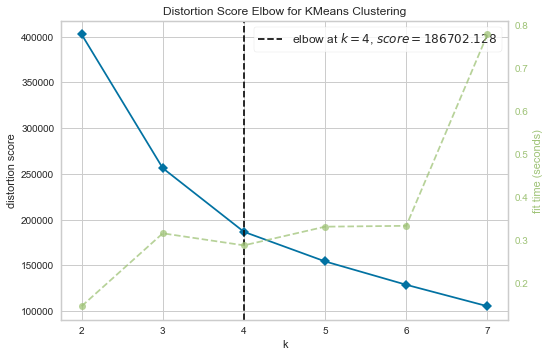

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans_obj, k=(2,8))

visualizer.fit(data_new)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

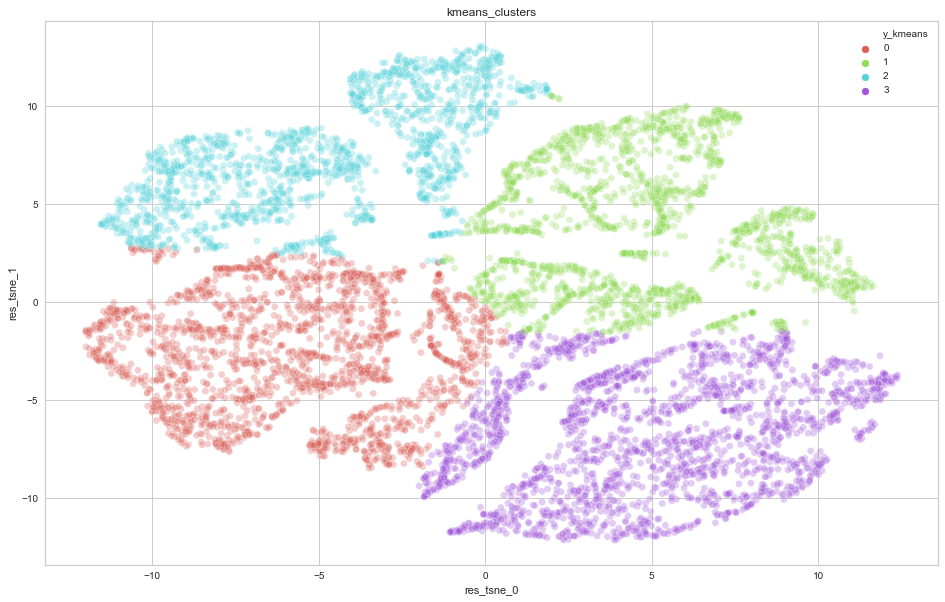

In [24]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=data_new['res_tsne_0'], y=data_new['res_tsne_1'],
    palette=sns.color_palette("hls", 4),
    data=data_new,
    hue=data_new['y_kmeans'],
    legend="full",
    alpha=0.3
).set(title='kmeans_clusters');

In [25]:
score = silhouette_score(data_new, labels_kmeans, metric='euclidean')
score

0.3933842772969137

In [37]:
sklearn.metrics.davies_bouldin_score(data_new, labels_kmeans)

0.8273525912799861

# Hierarchical Cluster

In [26]:
clustering = AgglomerativeClustering(n_clusters=4).fit(data_new)

In [27]:
data_new['y_hierarchical']=clustering.labels_

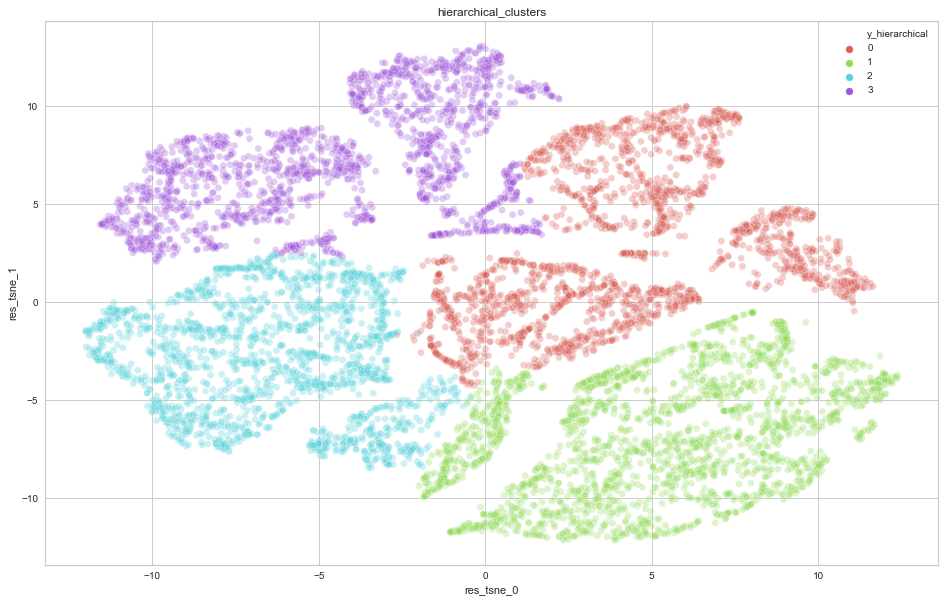

In [28]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=data_new['res_tsne_0'], y=data_new['res_tsne_1'],
    palette=sns.color_palette("hls", 4),
    data=data_new,
    hue=data_new['y_hierarchical'],
    legend="full",
    alpha=0.3
).set(title='hierarchical_clusters');

In [29]:
score = silhouette_score(data_new, clustering.labels_, metric='euclidean')
score

0.37892920605538355

In [38]:
sklearn.metrics.davies_bouldin_score(data_new, clustering.labels_)

0.9018742664497904

# DBSCAN

Try_PCA_before_it

In [61]:
data_new_Dbscan=data_new.iloc[:,:-4]
data_new_Dbscan

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.379045,0.862497,0.422994,0.000000,0.455879,0.000000,0.222393,0.000000,0.115477,0.000000,0.000000,0.186733,0.466811,0.490324,0.438874,0.000000,1.0
1,0.819116,0.932886,0.000000,0.000000,0.000000,0.815075,0.000000,0.000000,0.000000,0.243529,0.333889,0.000000,0.771814,0.767919,0.620013,0.289506,1.0
2,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.435970,0.782631,0.593925,0.572303,0.000000,1.0
3,0.752871,0.710494,0.677125,0.688918,0.000000,0.495472,0.115477,0.115477,0.000000,0.087355,0.143798,0.117816,0.782631,0.000000,0.541349,0.000000,1.0
4,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.115477,0.115477,0.000000,0.000000,0.000000,0.117816,0.495375,0.601905,0.488693,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.343413,1.000000,0.525644,0.000000,0.566509,0.000000,1.000000,0.000000,0.874469,0.000000,0.000000,0.330750,0.466811,0.534304,0.346621,0.584963,0.0
8946,0.304921,1.000000,0.528416,0.000000,0.569497,0.000000,1.000000,0.000000,0.874469,0.000000,0.000000,0.330750,0.466811,0.519056,0.436512,0.000000,0.0
8947,0.324169,0.874469,0.461047,0.000000,0.496890,0.000000,0.874469,0.000000,0.736966,0.000000,0.000000,0.304549,0.466811,0.407049,0.392423,0.321928,0.0
8948,0.271065,0.874469,0.000000,0.000000,0.000000,0.336954,0.000000,0.000000,0.000000,0.168234,0.227915,0.000000,0.358276,0.367415,0.358114,0.321928,0.0


In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
data_new_Dbscan=pd.DataFrame(pca.fit_transform(data_new_Dbscan),index=data_new_Dbscan.index)

In [63]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(data_new_Dbscan)
distances, neighbors = neigh.kneighbors(data_new_Dbscan)
distances = np.sort(distances[:, -1], axis = 0)

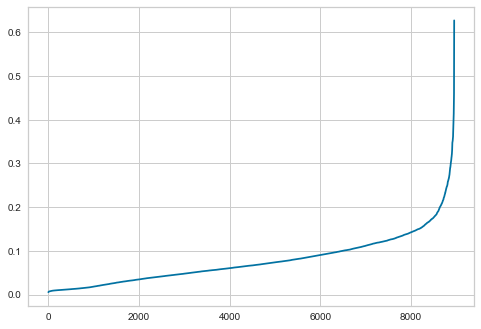

In [64]:
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt.plot(distances_df['index'],distances_df['distances'])

In [65]:
db1 = DBSCAN(eps = 0.14, min_samples =5).fit(data_new_Dbscan)

data_new_Dbscan["y_DBSCAN"] = db1.labels_

In [66]:
data_new_Dbscan["y_DBSCAN"].value_counts()

 0    4440
 1    2009
 3     769
 4     712
-1     572
 2     388
 7      24
 5      15
 6      10
 8       6
 9       5
Name: y_DBSCAN, dtype: int64

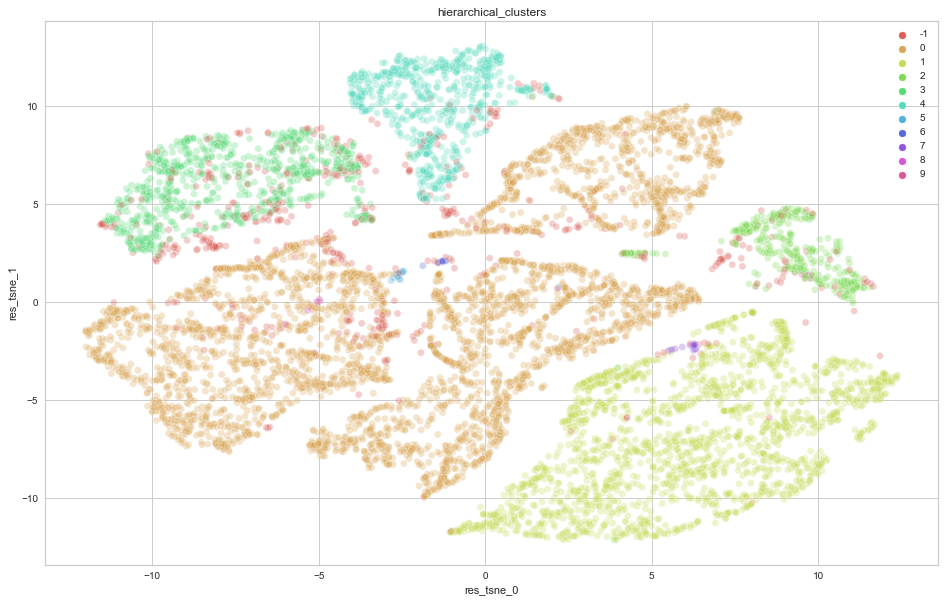

In [67]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=data_new['res_tsne_0'], y=data_new['res_tsne_1'],
    palette=sns.color_palette("hls",11),
    data=data_new,
    hue=db1.labels_,
    legend="full",
    alpha=0.3
).set(title='hierarchical_clusters');

In [68]:
sklearn.metrics.davies_bouldin_score(data_new, db1.labels_)

1.9788278863184352

In [69]:
score = silhouette_score(data_new, db1.labels_, metric='euclidean')
score

-0.1865694046291085

# Comments:

1-Data imputation :

best way between different ways of imputation used was KNNImputer as it introduces less bias in imputed values trying to keep

all correlation between nan column with another column unlike(mean,median,mode).


2-Transformation:

best practice was MinMax Scaler as it bounds each cluster within certain range which helps in more separated clusters.

3-Evaluating performance of clustering based on :

3.1 Silhoutte score

3.2 Tsne visualization

3.3 davies_bouldin_score

All indicates that the best clustering results obtained was Hierarchical Clustering and the worst was DBSCAN (as tuning eps and 

min points was a tough task).